# Contents
### 1. Importing libraries
### 2. Importing data
### 3. Create bar chart - how many orders by day of the week
### 4. Create histogram of 'prices'
### 5. Create line chart - prices by orders day of the week
### 6. Histogram "order_hour_of_day" 
### 7. Bar chart - distribution of orders among customers in terms of loyalty
### 8. Line chart - expediture by hour of the day
### 9. Line charts - connection between age and family status 
### 10. Age & Spending Power Scatterplot



# 1. Importing libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [2]:
# setting path to Data Folder

path = r'C:\Documents\Career Foundry\Python\Instacart Basket Analysis\02 Data'

In [3]:
# importing project data

dfm = pd.read_pickle(os.path.join(path, 'Prepped Data', 'dfm.pkl'))

In [4]:
dfm.shape

(32403007, 33)

In [5]:
dfm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# 3. Create bar chart - how many orders by day of the week

<AxesSubplot:>

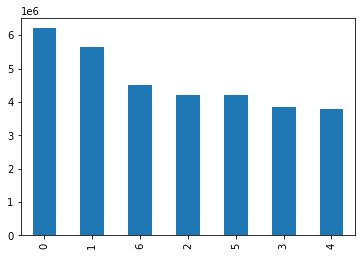

In [19]:
# Create bar chart

dfm['orders_day_of_week'].value_counts().plot.bar()

# 4. Create histogram of 'prices'

<AxesSubplot:ylabel='Frequency'>

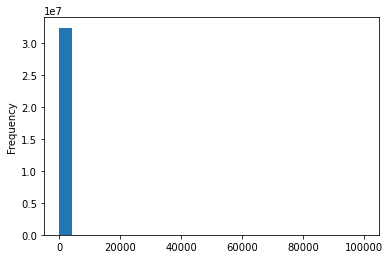

In [9]:
# Create historgram

dfm['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

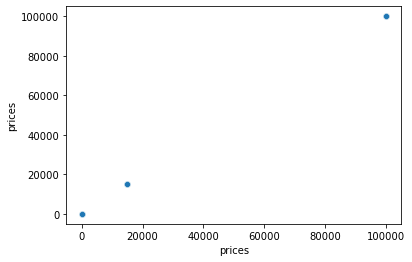

In [10]:
sns.scatterplot(x = 'prices', y = 'prices', data = dfm)

In [11]:
# create subset with rows of dfm that include orders that cost over 100

dfm_po100 = dfm.loc[dfm['prices'] > 100]

In [12]:
dfm_po100['prices'].value_counts(dropna = False)

14900.0    4429
99999.0     698
Name: prices, dtype: int64

In [13]:
# replace prices over 100 with nan

dfm.loc[dfm['prices'] > 100, 'prices'] = np.nan

In [15]:
# create subset with rows of dfm that include orders that cost over 100

dfm_po100 = dfm.loc[dfm['prices'] > 100]

In [18]:
dfm_po100['prices'].value_counts(dropna = False)

Series([], Name: prices, dtype: int64)

In [19]:
dfm['prices'].value_counts(dropna = False)

12.300000    624261
10.300000    510496
4.000000     447272
6.300000     438467
1.300000     425691
              ...  
20.200001       123
22.700001        99
21.500000        85
18.299999        11
21.000000         8
Name: prices, Length: 241, dtype: int64

In [20]:
dfm['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

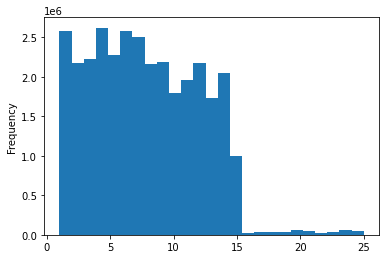

In [21]:
# Create historgram

dfm['prices'].plot.hist(bins = 25)

## Create randomized subset of dfm

In [25]:
# create randomized seed

np.random.seed(4)

In [26]:
# create a randomized array of boolean values the same length of dfm for 70% of dfm 

dev  = np.random.rand(len(dfm)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
big = dfm[dev]

In [29]:
small = dfm[~dev]

In [30]:
# Create df_2 - using small subset of dfm and 2 columns

df_2 = small [['orders_day_of_week', 'prices']]

In [31]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


In [29]:
df_2.shape

(9720570, 2)

# 5. Create line chart - prices by orders day of the week

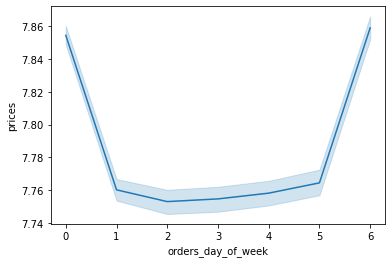

In [30]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [10]:
# Reset path to be able to access the 'Analysis' folder

path = r'C:\Documents\Career Foundry\Python\Instacart Basket Analysis'

In [45]:
# Export line figure

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line.png'))


# 6. Histogram "order_hour_of_day" 

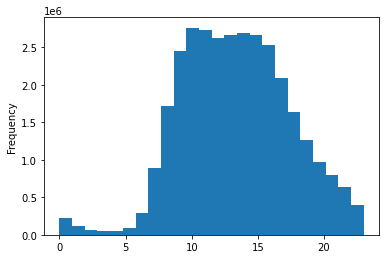

In [43]:
# Create historgram

hist2 = dfm['order_hour_of_day'].plot.hist(bins = 24)

This histogram illustrates how many times each hour of the day appears in the "order_hour_of_day" column and which hour of the day most of the sales take place

In [44]:
# Export histogram figure

hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_DOW.png'))

# 7. Bar chart - distribution of orders among customers in terms of loyalty

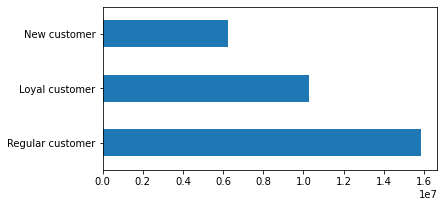

In [16]:
# Create bar chart using 'loyalty_flag' column

bar2 = dfm['loyalty_flag'].value_counts().plot(kind='barh', figsize=(6, 3))

In [21]:
# Export bar figure

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_orders.png'))

# 8. Line chart - expediture by hour of the day

In [48]:
# hour of the day is the time unit on the x axis of the line chart

In [32]:
# Small is a df of 30% of dfm using a randomized subset of rows
# Create df_2 using 2 columns of small df

df_2 = small [['order_hour_of_day', 'prices']]

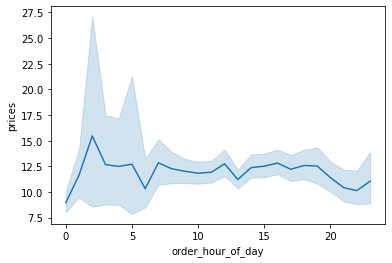

In [33]:
line2 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [34]:
# Export line figure

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_day_prices.png'))

In [59]:
dfm.groupby('order_hour_of_day')['prices'].sum()

order_hour_of_day
0     1.708558e+06
1     9.029237e+05
2     5.409011e+05
3     4.013021e+05
4     4.172418e+05
5     6.883993e+05
6     2.270611e+06
7     6.966836e+06
8     1.338256e+07
9     1.902522e+07
10    2.139881e+07
11    2.126098e+07
12    2.039209e+07
13    2.073395e+07
14    2.097868e+07
15    2.077650e+07
16    1.977704e+07
17    1.629356e+07
18    1.277827e+07
19    9.805347e+06
20    7.612936e+06
21    6.209255e+06
22    4.956932e+06
23    3.136476e+06
Name: prices, dtype: float32

In [136]:
pd.options.display.max_columns = None

# 9. Line charts - connection between age and family status 

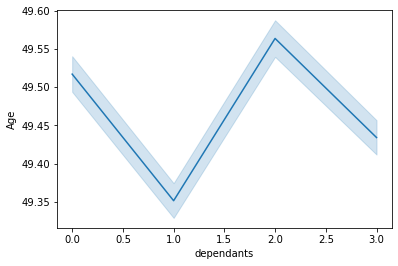

In [65]:
line = sns.lineplot(data = small, x = 'dependants', y = 'Age')

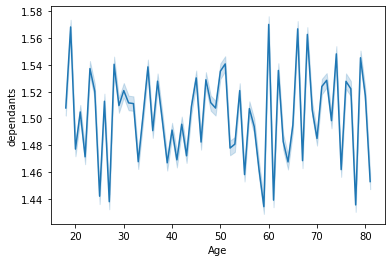

In [100]:
LineAvg = sns.lineplot(data = small, x = 'Age', y = 'dependants')

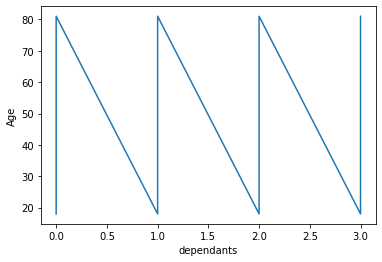

In [90]:
line = sns.lineplot(data = small, x = 'dependants', y = 'Age', estimator = None)

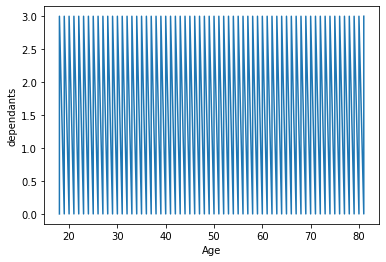

In [94]:
lineN = sns.lineplot(data = small, x = 'Age', y = 'dependants', estimator = None

I can't figure out what relationship Age and dependants have to eachother or how to read these line charts. Maybe there is no correlation?

In [101]:
# Export lineAvg figure

LineAvg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_avg_dependants_age.png'))

## 10. Age & Spending Power Scatterplot

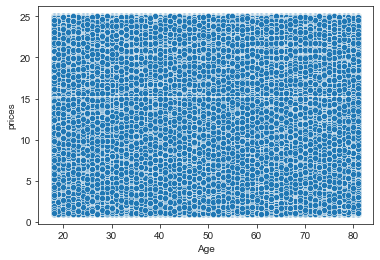

In [128]:
ScatPA = sns.scatterplot(x = 'Age', y = 'prices', data = small)

In [132]:
# Export Scatterplot using Age, prices as ScatAgePrice.png

ScatPA.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ScatAgePrice.png'))

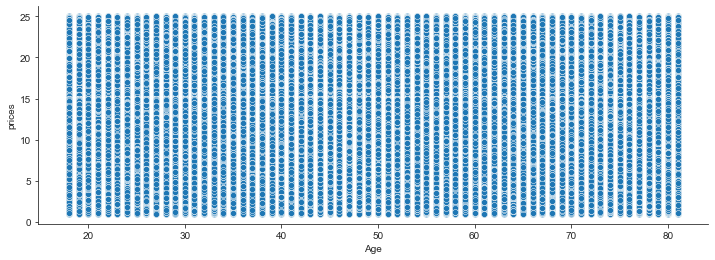

In [124]:
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(12, 4)
SCatPAWide = sns.scatterplot(x = 'Age', y = 'prices', data = small, ax=ax)    
sns.despine()

In [125]:
# Export Wide Scatterplot using Age, prices as ScatPawide.png

SCatPAWide.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'SCatPAWide.png'))

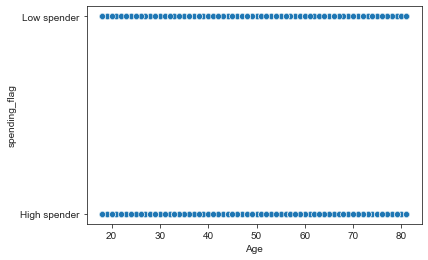

In [141]:
ScatSA = sns.scatterplot(x = 'Age', y = 'spending_flag', data = small)

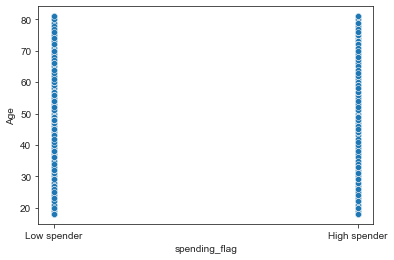

In [140]:
ScatSA = sns.scatterplot(x = 'spending_flag', y = 'Age', data = small)

There is no correlation between spending and age

In [142]:
# Export Wide Scatterplot using Age, prices as ScatPawide.png

SCatPAWide.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'SCatPAWide.png'))